# Investigating Fandango Movie Ratings
In this project, I'll go into Fandango.com and take a deep look at their scores. I will apply some science to review if any ratings are skewed, compare them to possibly other moving rating websites, and apply comparisons over the years.

In [46]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100 # To expand all dfs
# importing data
previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")
# cols to isolate for later usage
previous_cols = ["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]
after_cols = ["movie", "year", "fandango"]
previous_fandango = previous[previous_cols].copy()
after_fandango = after[after_cols].copy()
# verify data
print(fandango.head(5))
print(movies1617.head(5))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  Metacritic_norm  Metacritic_user_nom  IMDB_norm  \
0     3.7

In [117]:
previous_sample_fandango = previous[previous["Fandango_votes"] > 30].sample(30, random_state=1)
after_sample_fandango = after[after["tmeter"] > 30].sample(30, random_state=1)
print(previous_sample_fandango.head(3))
print(after_sample_fandango.head(3))

                  FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
98     Get Hard (2015)              29                   48          34   
66     The Gift (2015)              93                   79          77   
53  Hot Pursuit (2015)               8                   37          31   

    Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
98              3.8   6.1             4.0                   3.9     1.45   
66              8.3   7.6             4.0                   3.7     4.65   
53              3.7   4.9             4.0                   3.7     0.40   

    RT_user_norm  Metacritic_norm  Metacritic_user_nom  IMDB_norm  \
98          2.40             1.70                 1.90       3.05   
66          3.95             3.85                 4.15       3.80   
53          1.85             1.55                 1.85       2.45   

    RT_norm_round  RT_user_norm_round  Metacritic_norm_round  \
98            1.5                 2.5                

In [115]:
# Extract the 2015 & 2016 movies with boolean series
films_in_2015 = previous["FILM"].str.contains("2015")
after_2016 = after[after["year"] == 2016]
# Make the df copy
previous_2015 = previous[films_in_2015].copy()
print(previous_2015.head(5))
print(after_2016.head(5))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  Metacritic_norm  Metacritic_user_nom  IMDB_norm  \
0     3.7

# Visualization charts

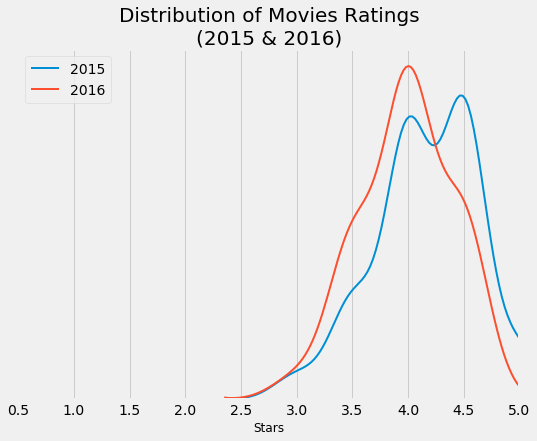

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
plt.title("Distribution of Movies Ratings\n(2015 & 2016)", fontsize=20)
plt.xlabel("Stars", fontsize=12)
plt.yticks([])
plt.xlim(0.5,5)
plt.style.use('fivethirtyeight')
sns.kdeplot(previous_sample_fandango["Fandango_Stars"], ax=ax, label="2015", linewidth=2)
sns.kdeplot(after_sample_fandango["fandango"], ax=ax, label="2016", linewidth=2)
plt.show()

In [128]:
# Neat trick
print("2015" + "\n" + "-"*16)
print(previous_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100)
print("2016" + "\n" + "-"*16)
print(after_2016['fandango'].value_counts(normalize=True).sort_index() * 100)

2015
----------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2016
----------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


# Computing mean, median, and mode for each distribution

In [201]:
previous_mean = previous["Fandango_Stars"].mean()
previous_median = previous["Fandango_Stars"].median()
previous_mode = previous["Fandango_Stars"].mode()[0]

after_mean = after["fandango"].mean()
after_median = after["fandango"].median()
after_mode = after["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [previous_mean, previous_median, previous_mode]
summary["2016"] = [after_mean, after_median, after_mode]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


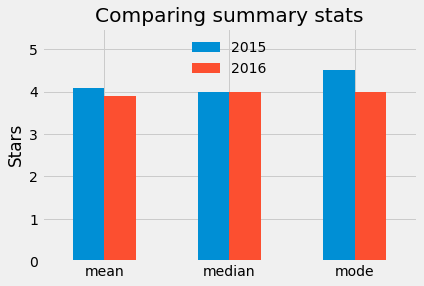

In [209]:
plt.style.use('fivethirtyeight')
summary.plot.bar(title="Comparing summary stats", rot=0)
plt.ylim(0,5.5)
plt.ylabel("Stars")
plt.legend(framealpha=0, loc='upper center')